# Урок 1. Кейс 1. EDA по Hourly Energy Consumption и Brent

ЗАДАНИЕ 1.

Выберите наборы данных. которые можно интерпретировать, как временные ряды:


а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

ОТВЕТ

ЗАДАНИЕ 1.

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.


ЗАДАНИЕ 2.

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с
информацией о потреблении энергии в одном из районов Восточной Электросети США.
Сделайте описание особенностей этой выборки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data_PJME = pd.read_csv('PJME_hourly.csv', index_col=[0], parse_dates=[0])

In [4]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


Результат анализа типов показывает, что интервал изменения индексов начинается от 2005-12-31 01:00:00 и идет до 2018-01-02 00:00:00. Мы знаем из описания, что шаг измерений по времени составляет 1 час. Общий объем данных составляет 119068 значений, а тип измеряемой информации при записи был определен как float64.

In [6]:
data.shape[0]

119068

In [7]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


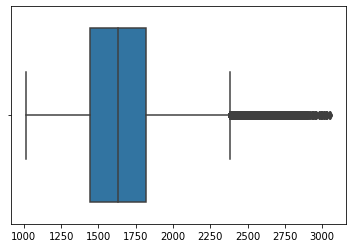

In [8]:
sns.boxplot(data.values)

In [9]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Пропусков нет

In [10]:
data.index.nunique() == data.shape[0]

False

In [11]:
data.index.nunique()

119064

есть не уникальные значения (4 значения)

Text(0, 0.5, 'МВт')

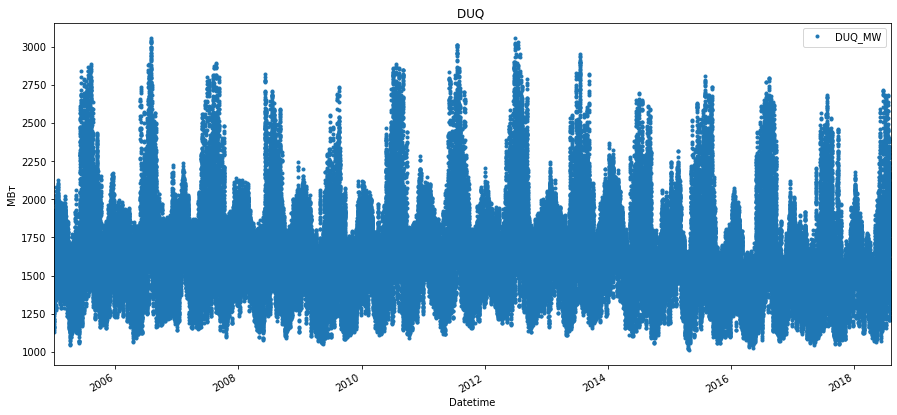

In [12]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ ' )
plt.ylabel ( 'МВт' )



- Основные статистики показали, что пропусков нет
- Основные статистики показали, что выбросов тоже нет
- Основные статистики показали, что есть дублирующие значения
- Визуальный анализ показывает что:
    - Предъявленные данные имеют циклы

Сравним DUQ_hourly и PJME_hourly

Text(0, 0.5, 'МВт')

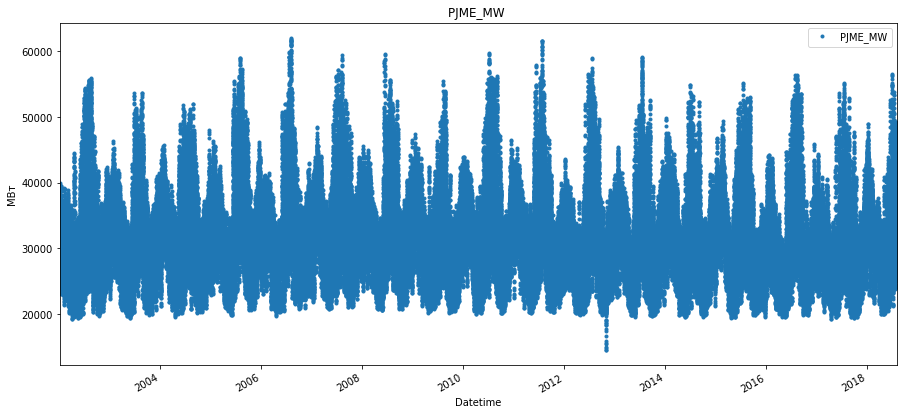

In [13]:
data_PJME.plot( style = '.', figsize = ( 15, 7 ), title = 'PJME_MW ' )
plt.ylabel ( 'МВт' )

In [14]:
Compare_data = pd.DataFrame({'PJME':data_PJME['PJME_MW'].describe().values,'DUQ':data['DUQ_MW'].describe().values} )
Compare_data.index = data_PJME['PJME_MW'].describe().index
Compare_data

,PJME,DUQ
count,145366.000000,119068.000000
mean,32080.222831,1658.820296
std,6464.012166,301.740640
min,14544.000000,1014.000000
25%,27573.000000,1444.000000
50%,31421.000000,1630.000000
75%,35650.000000,1819.000000
max,62009.000000,3054.000000


Нет большой разницы  в масштабах задачи на уровне количества примеров. В случае PJME_MW и DUQ_MW число примеро отличаются на 15-20%. 
Характер этих рядов существенно не отличается. PJME_MW имеет выраженный порядок смены сезонов (рис.1) и дня и ночи, так же как и DUQ_MW. 

Оба ряда не содержат пропусков в обоих последовательностях, однако для PJME_MW есть необычные артефакты: выброс 2012.10 в потреблении энергии, в отличае от DUQ_MW, где выбросов нет.
Однако ряды различаются по средним и средним отклонениям и др. параметрам существенно.

ЗАДАНИЕ 3.

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям ,
по месяцам.

In [15]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data = brent_data.sort_index(ascending=True)
brent_data.head(10)

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63
2010-09-06,76.87
2010-09-07,77.26
2010-09-08,77.93
2010-09-09,77.21


In [16]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [17]:
#представление по неделям 
brent_data_w=brent_data.resample("W").mean()

In [18]:
brent_data_w = brent_data_w.sort_index(ascending=True)

In [19]:
brent_data_w.head(10)

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667
2010-10-10,84.146667
2010-10-17,83.498333
2010-10-24,82.795000
2010-10-31,83.361667


In [20]:
#представление по месяцам
brent_data_m=brent_data.resample("M").mean()
brent_data_m = brent_data_m.sort_index(ascending=True)

In [21]:
brent_data_m.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


ЗАДАНИЕ 4.

Постройте график изменения среднего по выборке и среднего отклонения по выборке на
недельных, месячных и годовых группах для Brent.

In [22]:
#представление по неделям 
brent_data_y=brent_data.resample("Y").mean()
brent_data_y = brent_data_y.sort_index(ascending=True)
brent_data_y.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


Text(0.5, 0, 't')

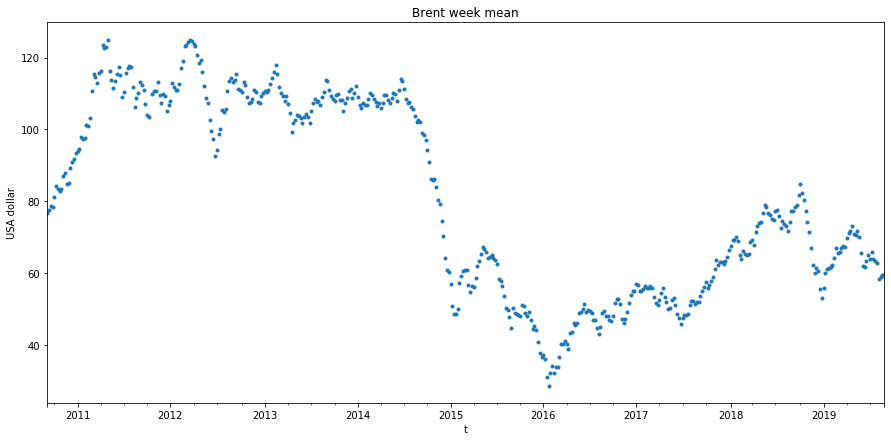

In [23]:

_ = brent_data_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent week mean')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

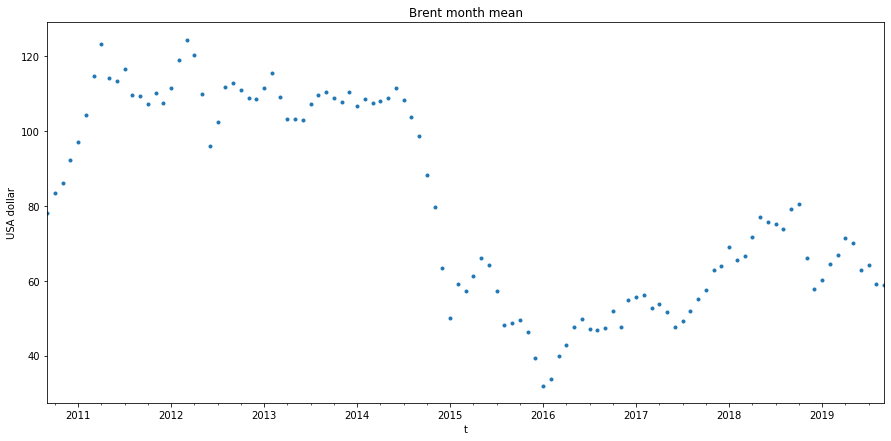

In [24]:

_ = brent_data_m['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent month mean')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

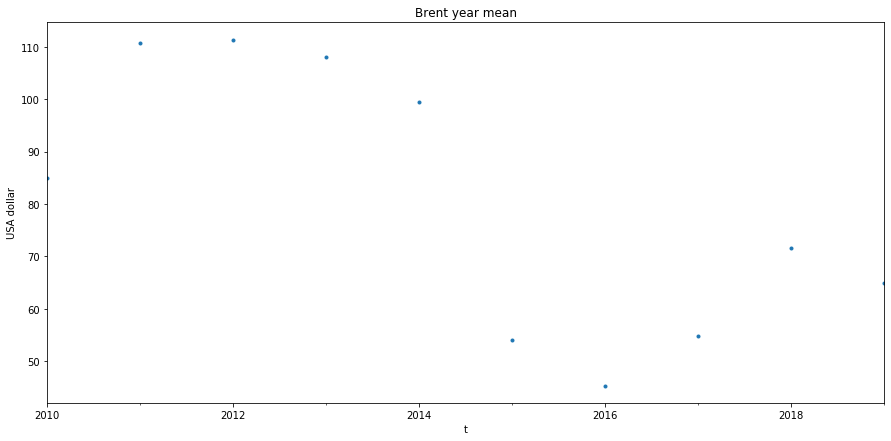

In [25]:

_ = brent_data_y['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent year mean')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [26]:
brent_data_std_w=brent_data.resample("W").std()
brent_data_std_m=brent_data.resample("M").std()
brent_data_std_y=brent_data.resample("Y").std()

Text(0.5, 0, 't')

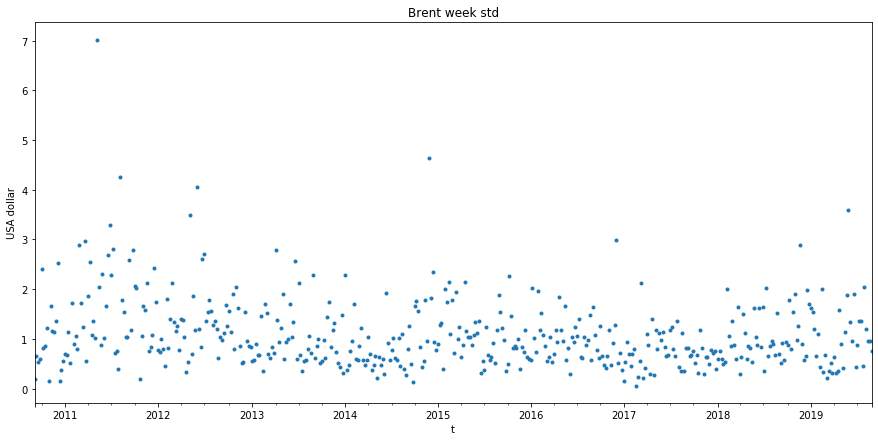

In [27]:
_ = brent_data_std_w['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent week std')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

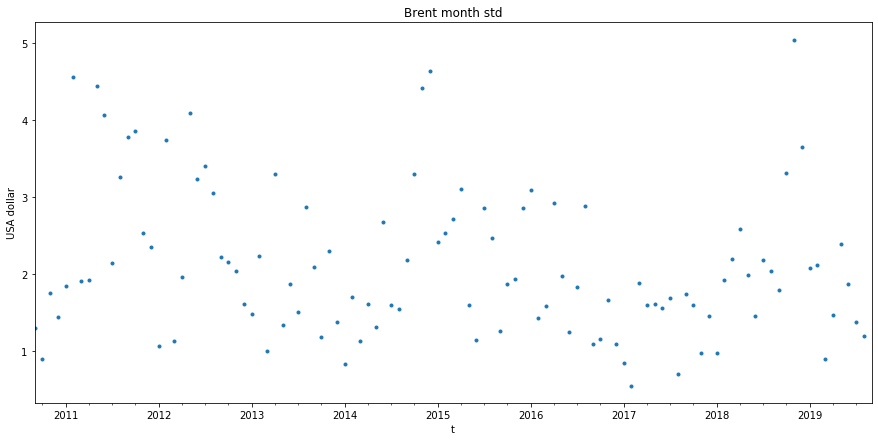

In [28]:
_ = brent_data_std_m['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent month std')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

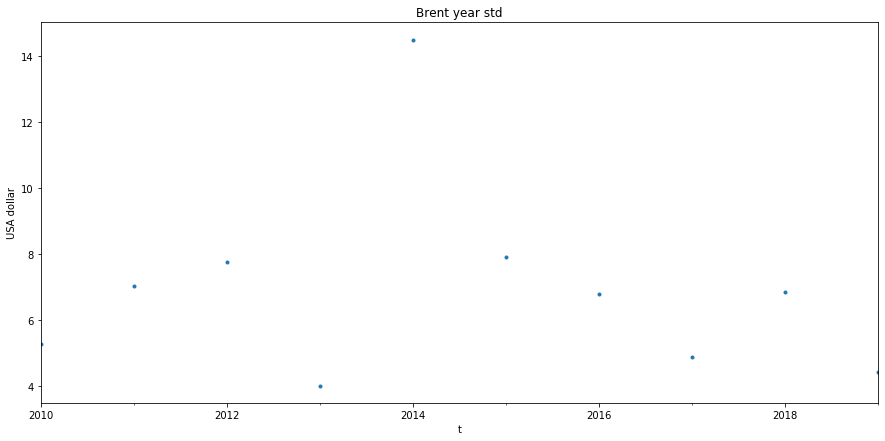

In [29]:
_ = brent_data_std_y['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent year std')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [30]:
#График изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent
brent_x=['w','m','y']
brent_means=[]
brent_stds=[]

brent_means.append(brent_data_w.mean())
brent_means.append(brent_data_m.mean())
brent_means.append(brent_data_y.mean())

brent_stds.append(brent_data_w.std())
brent_stds.append(brent_data_m.std())
brent_stds.append(brent_data_y.std())


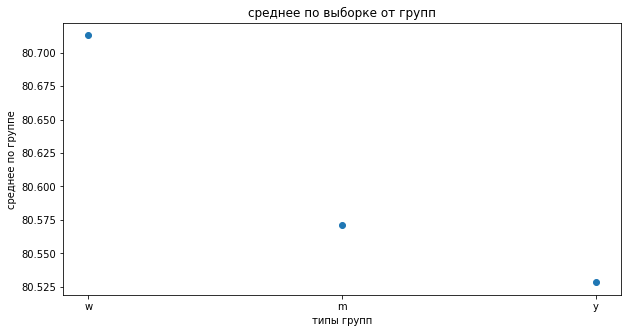

In [31]:
plt.figure(figsize=(10,5))
plt.plot(brent_x, brent_means, 'o')
plt.xlabel('типы групп')
plt.ylabel('среднее по группе')
plt.title('среднее по выборке от групп')

plt.show()

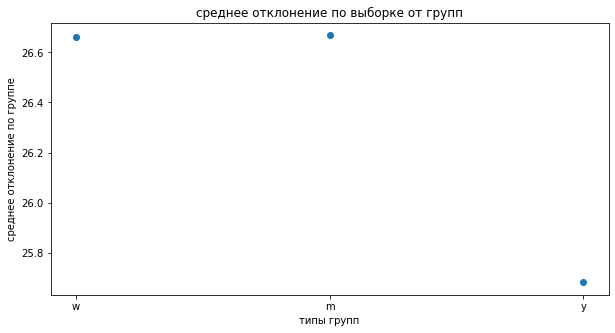

In [32]:
plt.figure(figsize=(10,5))
plt.plot(brent_x, brent_stds, 'o')
plt.xlabel('типы групп')
plt.ylabel('среднее отклонение по группе')
plt.title('среднее отклонение по выборке от групп')

plt.show()

ЗАДАНИЕ 5.

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках
по сравнению с годовым.

При переходе от групп недельных, далее месячные и далее годовые - среднее и среднее отклонение уменьшались, что видно на вышележащих графиках